In [1]:
# Configs

label_name = "math"
embedding_type = "perf" # time or perf

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv(f"../../dataset/{embedding_type}/small_{label_name}_dataset.csv")
dataset = pd.get_dummies(dataset)

# dataset = dataset.filter(regex=("(branch-misses_FEATURE_TYPE_LOGLOG_POLYNOMIAL|branches_FEATURE_TYPE_LOGLOG_POLYNOMIAL|branches_FEATURE_TYPE_POLYNOMIAL|context-switches_FEATURE_TYPE_LOGLOG_POLYNOMIAL|context-switches_FEATURE_TYPE_LOG_POLYNOMIAL|cpu-migrations_FEATURE_TYPE_LOGLOG_POLYNOMIAL|cpu-migrations_FEATURE_TYPE_LOG_POLYNOMIAL|cycles_FEATURE_TYPE_LOGLOG_POLYNOMIAL|instructions_FEATURE_TYPE_LOGLOG_POLYNOMIAL|instructions_FEATURE_TYPE_POLYNOMIAL|page-faults_FEATURE_TYPE_LOGLOG_POLYNOMIAL|stalled-cycles-frontend_FEATURE_TYPE_LOGLOG_POLYNOMIAL|task-clock_FEATURE_TYPE_LOGLOG_POLYNOMIAL)"))
# dataset = dataset.filter(regex=("(branch-misses_INTERCEPT|page-faults_INTERCEPT|stalled-cycles-frontend_INTERCEPT|branch-misses_FEATURE_TYPE_LOGLOG_POLYNOMIAL|branches_FEATURE_TYPE_POLYNOMIAL|instructions_FEATURE_TYPE_LOGLOG_POLYNOMIAL|instructions_FEATURE_TYPE_POLYNOMIAL|page-faults_FEATURE_TYPE_LOGLOG_POLYNOMIAL|stalled-cycles-frontend_FEATURE_TYPE_FRACTIONAL_POWER|stalled-cycles-frontend_FEATURE_TYPE_LOGLOG_POLYNOMIAL')"))
# dataset = dataset.filter(regex=("(branch-misses_INTERCEPT|page-faults_INTERCEPT|branch-misses_FEATURE_TYPE_LOGLOG_POLYNOMIAL|branches_FEATURE_TYPE_POLYNOMIAL|instructions_FEATURE_TYPE_POLYNOMIAL|stalled-cycles-frontend_FEATURE_TYPE_FRACTIONAL_POWER)"))
dataset = dataset.filter(regex=(".*"))

dataset = dataset/(0.00001 + dataset.max())
dataset.head()

branch-misses_FEATURE_CONFIG  branch-misses_INTERCEPT  branch-misses_R-VAL  \
0                      0.000000                 0.896508         1.454713e-03   
1                      0.133333                 0.905681         3.885145e-02   
2                      0.000000                 0.912733         1.073648e-02   
3                      0.666666                 0.909931        -3.024599e-09   
4                      0.166666                 0.906618         1.024812e-03   

   branches_FEATURE_CONFIG  branches_INTERCEPT  branches_R-VAL  \
0                 0.111111            0.147594        0.000289   
1                 0.011111            0.150124        0.002598   
2                 0.111111            0.149257        0.000756   
3                 0.111111            0.148120        0.002396   
4                 0.111111            0.147745        0.003054   

   context-switches_FEATURE_CONFIG  context-switches_INTERCEPT  \
0                              0.0                         0.0   
1                              0.0                         0.0   
2                              0.0                         0.0   
3                              0.0                         0.0   
4                              0.0                         0.0   

   context-switches_R-VAL  cpu-migrations_FEATURE_CONFIG  ...  \
0                     0.0                            0.0  ...   
1                     0.0                            0.0  ...   
2                     0.0                            0.0  ...   
3                     0.0                            0.0  ...   
4                     0.0                            0.0  ...   

   stalled-cycles-frontend_FEATURE_TYPE_FRACTIONAL_POWER  \
0                                            0.00000       
1                                            0.99999       
2                                            0.00000       
3                                            0.00000       
4                                            0.00000       

   stalled-cycles-frontend_FEATURE_TYPE_LOGLOG_POLYNOMIAL  \
0                                                0.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   stalled-cycles-frontend_FEATURE_TYPE_LOG_POLYNOMIAL  \
0                                            0.99999     
1                                            0.00000     
2                                            0.00000     
3                                            0.00000     
4                                            0.99999     

   stalled-cycles-frontend_FEATURE_TYPE_POLYNOMIAL  \
0                                          0.00000   
1                                          0.00000   
2                                          0.99999   
3                                          0.00000   
4                                          0.00000   

   stalled-cycles-frontend_FEATURE_TYPE_POWER  \
0                                     0.00000   
1                                     0.00000   
2                                     0.00000   
3                                     0.99999   
4                                     0.00000   

   task-clock_FEATURE_TYPE_FRACTIONAL_POWER  \
0                                   0.00000   
1                                   0.00000   
2                                   0.00000   
3                                   0.99999   
4                                   0.99999   

   task-clock_FEATURE_TYPE_LOGLOG_POLYNOMIAL  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   task-clock_FEATURE_TYPE_LOG_POLYNOMIAL  task-clock_FEATURE_

In [4]:
labels = pd.read_csv(f"../../dataset/{embedding_type}/small_{label_name}_dataset.csv").filter(regex=("label"))
labels.head()

label
0      0
1      0
2      0
3      0
4      0

In [5]:
data = dataset.copy().to_numpy() 
target = labels.copy().pop('label').to_numpy() 

In [6]:
from minisom import MiniSom    

# Initialization and training
n_neurons = 6
m_neurons = 6
som = MiniSom(n_neurons, m_neurons, data.shape[1], sigma=1, learning_rate=.5, random_seed=42, neighborhood_function='gaussian')

som.pca_weights_init(data)

/usr/local/lib/python3.9/site-packages/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


To understand how the training evolves we can plot the quantization and topographic error of the SOM at each step. This is particularly important when estimating the number of iterations to run:

In [7]:
max_iter = 1000000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

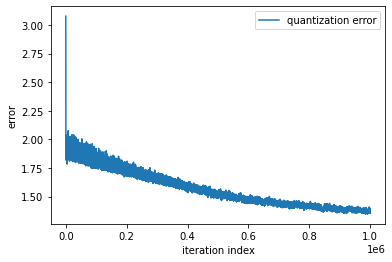

In [8]:
plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.ylabel('error')
plt.xlabel('iteration index')
plt.legend()
plt.show()

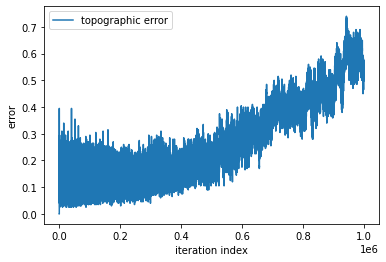

In [9]:
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iteration index')
plt.legend()
plt.show()

In [10]:
som.train(data, max_iter, verbose=True)

 [    1076 / 1000000 ]   0% - 0:03:06 left 

 [    2079 / 1000000 ]   0% - 0:03:12 left 

 [    2890 / 1000000 ]   0% - 0:03:27 left 

 [    3927 / 1000000 ]   0% - 0:03:23 left 

 [    4938 / 1000000 ]   0% - 0:03:22 left 

 [    5981 / 1000000 ]   1% - 0:03:20 left 

 [    6986 / 1000000 ]   1% - 0:03:19 left 

 [    8038 / 1000000 ]   1% - 0:03:18 left 

 [    9066 / 1000000 ]   1% - 0:03:17 left 

 [   10119 / 1000000 ]   1% - 0:03:16 left 

 [   11178 / 1000000 ]   1% - 0:03:15 left 

 [   12068 / 1000000 ]   1% - 0:03:17 left 

 [   12721 / 1000000 ]   1% - 0:03:22 left 

 [   13471 / 1000000 ]   1% - 0:03:34 left 

 [   14585 / 1000000 ]   1% - 0:03:31 left 

 [   15675 / 1000000 ]   2% - 0:03:28 left 

 [   16784 / 1000000 ]   2% - 0:03:26 left 

 [   17871 / 1000000 ]   2% - 0:03:24 left 

 [   18947 / 1000000 ]   2% - 0:03:23 left 

 [   20022 / 1000000 ]   2% - 0:03:21 left 

 [   21114 / 1000000 ]   2% - 0:03:20 left 

 [   22191 / 1000000 ]   2% - 0:03:19 left 

 [   23277 / 1000000 ]   2% - 0:03:18 left 

 [   24110 / 1000000 ]   2% - 0:03:19 left 

 [   25125 / 1000000 ]   3% - 0:03:19 left 

 [   26198 / 1000000 ]   3% - 0:03:18 left 

 [   27279 / 1000000 ]   3% - 0:03:17 left 

 [   28358 / 1000000 ]   3% - 0:03:16 left 

 [   29432 / 1000000 ]   3% - 0:03:15 left 

 [   30503 / 1000000 ]   3% - 0:03:15 left 

 [   31551 / 1000000 ]   3% - 0:03:14 left 

 [   32628 / 1000000 ]   3% - 0:03:13 left 

 [   33599 / 1000000 ]   3% - 0:03:13 left 

 [   34574 / 1000000 ]   3% - 0:03:13 left 

 [   34904 / 1000000 ]   3% - 0:03:18 left 

 [   35770 / 1000000 ]   4% - 0:03:18 left 

 [   36843 / 1000000 ]   4% - 0:03:18 left 

 [   37902 / 1000000 ]   4% - 0:03:17 left 

 [   38980 / 1000000 ]   4% - 0:03:16 left 

 [   40040 / 1000000 ]   4% - 0:03:16 left 

 [   41117 / 1000000 ]   4% - 0:03:15 left 

 [   42180 / 1000000 ]   4% - 0:03:14 left 

 [   43228 / 1000000 ]   4% - 0:03:14 left 

 [   44324 / 1000000 ]   4% - 0:03:13 left 

 [   45376 / 1000000 ]   5% - 0:03:13 left 

 [   46222 / 1000000 ]   5% - 0:03:13 left 

 [   47209 / 1000000 ]   5% - 0:03:13 left 

 [   48266 / 1000000 ]   5% - 0:03:13 left 

 [   49359 / 1000000 ]   5% - 0:03:12 left 

 [   50455 / 1000000 ]   5% - 0:03:11 left 

 [   51541 / 1000000 ]   5% - 0:03:11 left 

 [   52639 / 1000000 ]   5% - 0:03:10 left 

 [   53710 / 1000000 ]   5% - 0:03:10 left 

 [   54797 / 1000000 ]   5% - 0:03:09 left 

 [   55899 / 1000000 ]   6% - 0:03:09 left 

 [   56951 / 1000000 ]   6% - 0:03:08 left 

 [   57378 / 1000000 ]   6% - 0:03:10 left 

 [   57983 / 1000000 ]   6% - 0:03:12 left 

 [   59096 / 1000000 ]   6% - 0:03:11 left 

 [   60191 / 1000000 ]   6% - 0:03:10 left 

 [   61270 / 1000000 ]   6% - 0:03:10 left 

 [   62358 / 1000000 ]   6% - 0:03:09 left 

 [   63436 / 1000000 ]   6% - 0:03:09 left 

 [   64467 / 1000000 ]   6% - 0:03:08 left 

 [   65544 / 1000000 ]   7% - 0:03:08 left 

 [   66584 / 1000000 ]   7% - 0:03:08 left 

 [   67406 / 1000000 ]   7% - 0:03:08 left 

 [   68459 / 1000000 ]   7% - 0:03:08 left 

 [   69549 / 1000000 ]   7% - 0:03:07 left 

 [   70623 / 1000000 ]   7% - 0:03:07 left 

 [   71605 / 1000000 ]   7% - 0:03:07 left 

 [   72695 / 1000000 ]   7% - 0:03:06 left 

 [   73752 / 1000000 ]   7% - 0:03:06 left 

 [   74845 / 1000000 ]   7% - 0:03:05 left 

 [   75922 / 1000000 ]   8% - 0:03:05 left 

 [   76360 / 1000000 ]   8% - 0:03:06 left 

 [   77101 / 1000000 ]   8% - 0:03:07 left 

 [   78082 / 1000000 ]   8% - 0:03:07 left 

 [   79130 / 1000000 ]   8% - 0:03:07 left 

 [   80199 / 1000000 ]   8% - 0:03:06 left 

 [   81289 / 1000000 ]   8% - 0:03:06 left 

 [   82378 / 1000000 ]   8% - 0:03:05 left 

 [   83441 / 1000000 ]   8% - 0:03:05 left 

 [   84517 / 1000000 ]   8% - 0:03:04 left 

 [   85610 / 1000000 ]   9% - 0:03:04 left 

 [   86669 / 1000000 ]   9% - 0:03:04 left 

 [   87761 / 1000000 ]   9% - 0:03:03 left 

 [   88828 / 1000000 ]   9% - 0:03:03 left 

 [   89917 / 1000000 ]   9% - 0:03:03 left 

 [   90583 / 1000000 ]   9% - 0:03:03 left 

 [   90906 / 1000000 ]   9% - 0:03:04 left 

 [   91862 / 1000000 ]   9% - 0:03:04 left 

 [   92929 / 1000000 ]   9% - 0:03:04 left 

 [   94021 / 1000000 ]   9% - 0:03:03 left 

 [   95065 / 1000000 ]  10% - 0:03:03 left 

 [   96141 / 1000000 ]  10% - 0:03:03 left 

 [   97197 / 1000000 ]  10% - 0:03:02 left 

 [   98274 / 1000000 ]  10% - 0:03:02 left 

 [   99219 / 1000000 ]  10% - 0:03:02 left 

 [  100180 / 1000000 ]  10% - 0:03:02 left 

 [  101250 / 1000000 ]  10% - 0:03:01 left 

 [  102342 / 1000000 ]  10% - 0:03:01 left 

 [  103427 / 1000000 ]  10% - 0:03:01 left 

 [  104509 / 1000000 ]  10% - 0:03:00 left 

 [  105588 / 1000000 ]  11% - 0:03:00 left 

 [  106669 / 1000000 ]  11% - 0:03:00 left 

 [  107716 / 1000000 ]  11% - 0:02:59 left 

 [  108796 / 1000000 ]  11% - 0:02:59 left 

 [  109887 / 1000000 ]  11% - 0:02:59 left 

 [  110954 / 1000000 ]  11% - 0:02:58 left 

 [  112013 / 1000000 ]  11% - 0:02:58 left 

 [  113088 / 1000000 ]  11% - 0:02:58 left 

 [  114162 / 1000000 ]  11% - 0:02:57 left 

 [  115243 / 1000000 ]  12% - 0:02:57 left 

 [  116324 / 1000000 ]  12% - 0:02:57 left 

 [  117403 / 1000000 ]  12% - 0:02:56 left 

 [  118489 / 1000000 ]  12% - 0:02:56 left 

 [  119548 / 1000000 ]  12% - 0:02:56 left 

 [  120628 / 1000000 ]  12% - 0:02:55 left 

 [  121698 / 1000000 ]  12% - 0:02:55 left 

 [  122784 / 1000000 ]  12% - 0:02:55 left 

 [  123882 / 1000000 ]  12% - 0:02:54 left 

 [  124605 / 1000000 ]  12% - 0:02:55 left 

 [  125310 / 1000000 ]  13% - 0:02:55 left 

 [  126388 / 1000000 ]  13% - 0:02:55 left 

 [  127480 / 1000000 ]  13% - 0:02:55 left 

 [  128544 / 1000000 ]  13% - 0:02:54 left 

 [  129620 / 1000000 ]  13% - 0:02:54 left 

 [  130706 / 1000000 ]  13% - 0:02:54 left 

 [  131672 / 1000000 ]  13% - 0:02:54 left 

 [  132763 / 1000000 ]  13% - 0:02:53 left 

 [  133809 / 1000000 ]  13% - 0:02:53 left 

 [  134930 / 1000000 ]  13% - 0:02:53 left 

 [  135953 / 1000000 ]  14% - 0:02:52 left 

 [  136862 / 1000000 ]  14% - 0:02:52 left 

 [  137941 / 1000000 ]  14% - 0:02:52 left 

 [  139015 / 1000000 ]  14% - 0:02:52 left 

 [  140092 / 1000000 ]  14% - 0:02:51 left 

 [  141184 / 1000000 ]  14% - 0:02:51 left 

 [  142266 / 1000000 ]  14% - 0:02:51 left 

 [  143356 / 1000000 ]  14% - 0:02:51 left 

 [  144409 / 1000000 ]  14% - 0:02:50 left 

 [  145497 / 1000000 ]  15% - 0:02:50 left 

 [  146584 / 1000000 ]  15% - 0:02:50 left 

 [  146935 / 1000000 ]  15% - 0:02:50 left 

 [  147484 / 1000000 ]  15% - 0:02:51 left 

 [  148560 / 1000000 ]  15% - 0:02:50 left 

 [  149646 / 1000000 ]  15% - 0:02:50 left 

 [  150741 / 1000000 ]  15% - 0:02:50 left 

 [  151776 / 1000000 ]  15% - 0:02:50 left 

 [  152859 / 1000000 ]  15% - 0:02:49 left 

 [  153937 / 1000000 ]  15% - 0:02:49 left 

 [  155029 / 1000000 ]  16% - 0:02:49 left 

 [  156115 / 1000000 ]  16% - 0:02:48 left 

 [  157193 / 1000000 ]  16% - 0:02:48 left 

 [  158263 / 1000000 ]  16% - 0:02:48 left 

 [  159203 / 1000000 ]  16% - 0:02:48 left 

 [  160154 / 1000000 ]  16% - 0:02:48 left 

 [  161207 / 1000000 ]  16% - 0:02:47 left 

 [  162284 / 1000000 ]  16% - 0:02:47 left 

 [  163374 / 1000000 ]  16% - 0:02:47 left 

 [  164432 / 1000000 ]  16% - 0:02:46 left 

 [  165528 / 1000000 ]  17% - 0:02:46 left 

 [  166610 / 1000000 ]  17% - 0:02:46 left 

 [  167691 / 1000000 ]  17% - 0:02:46 left 

 [  168792 / 1000000 ]  17% - 0:02:45 left 

 [  169845 / 1000000 ]  17% - 0:02:45 left 

 [ 1000000 / 1000000 ] 100% - 0:00:00 left 
 quantization error: 1.388897182322961


To have an overview of how the samples are distributed across the map a scatter chart can be used where each dot represents the coordinates of the winning neuron. A random offset is added to avoid overlaps between points within the same cell


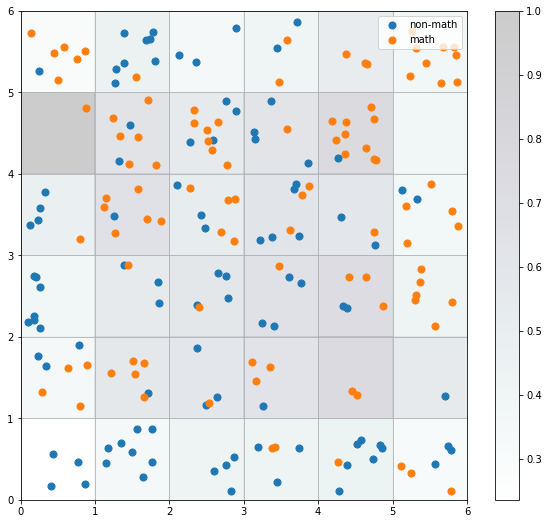

In [11]:
colors = ['C0', 'C1']

label_names = {0:'non-math', 1:'math'}

w_x, w_y = zip(*[som.winner(d) for d in data])
w_x=np.array(w_x)
w_y=np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.savefig('som_seed.png')
plt.show()

To have an idea of which neurons of the map are activated more often we can create another pseudocolor plot that reflects the activation frequencies:

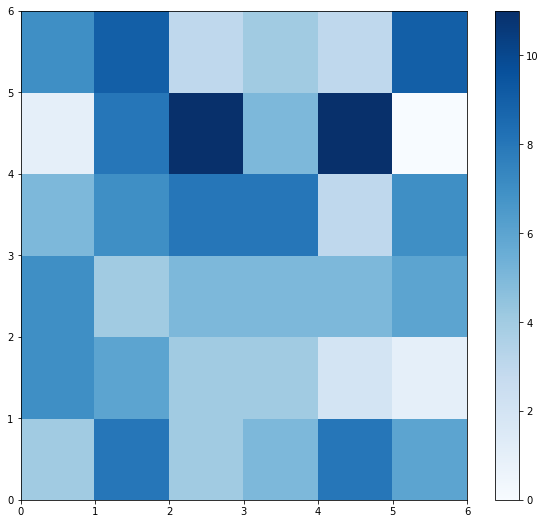

In [12]:
plt.figure(figsize=(10, 9))
frequencies = som.activation_response(data)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()

When dealing with a supervised problem, one can visualize the proportion of samples per class falling in a specific neuron using a pie chart per neuron:

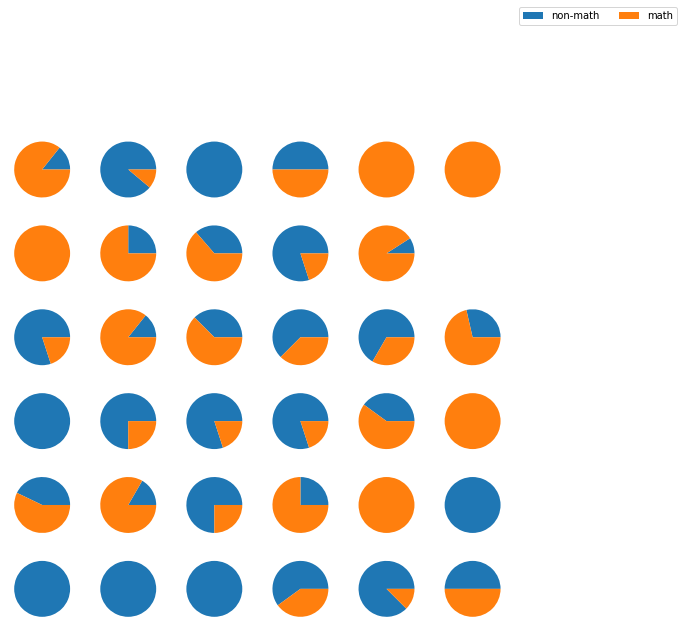

In [13]:
labels_map = som.labels_map(data, [label_names[t] for t in target])

fig = plt.figure(figsize=(9, 9))
the_grid = gridspec.GridSpec(n_neurons, m_neurons, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names.values()]
    plt.subplot(the_grid[n_neurons-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, label_names.values(), bbox_to_anchor=(3.5, 6.5), ncol=3)
plt.savefig('som_seed_pies.png')
plt.show()